In [ ]:
import csv
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Загрузка данных
df_train = pd.read_csv('gdrive/MyDrive/Data_analysis/ПИ/TrainData.csv')
df_test = pd.read_csv('gdrive/MyDrive/Data_analysis/ПИ/TestData.csv')

# Предобработка данных
# Заполнение пропусков для категориальных данных
for col in df_train.select_dtypes(include=['object']).columns:
    df_train[col].fillna('unknown', inplace=True)
    if col in df_test.columns:
        df_test[col].fillna('unknown', inplace=True)

# Заполнение пропусков для числовых данных
df_train.fillna(df_train.mean(numeric_only=True), inplace=True)
df_test.fillna(df_test.mean(numeric_only=True), inplace=True)

# Создание признаков и целевой переменной
X = df_train.drop(['target'], axis=1)
y = df_train['target'].apply(lambda x: 1 if x == 'Churn' else 0)

# Кодирование категориальных признаков
X = pd.get_dummies(X, drop_first=True)

# Обучение модели Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
average_roc_auc = scores.mean()
print(f'Средний ROC-AUC: {average_roc_auc}')

# Обучение модели на всем наборе данных
model.fit(X, y)

# Обработка тестового набора данных
X_test = pd.get_dummies(df_test, drop_first=True)

# Приведение столбцов тестового набора данных в соответствие с тренировочным набором
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Предсказание на тестовых данных
predictions = model.predict_proba(X_test)[:, 1]

# Сохранение предсказаний в файл
result_file_path = 'gdrive/MyDrive/Data_analysis/ПИ/result.txt'
pd.DataFrame(predictions, columns=['Prediction']).to_csv(result_file_path, index=False)


Средний ROC-AUC: 0.9289802761992864


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Загрузка данных
df_train = pd.read_csv('gdrive/MyDrive/Data_analysis/ПИ/TrainData.csv')
df_test = pd.read_csv('gdrive/MyDrive/Data_analysis/ПИ/TestData.csv')

# Предобработка данных
# Заполнение пропусков для категориальных данных
for col in df_train.select_dtypes(include=['object']).columns:
    df_train[col].fillna('unknown', inplace=True)
    if col in df_test.columns:
        df_test[col].fillna('unknown', inplace=True)

# Заполнение пропусков для числовых данных
df_train.fillna(df_train.mean(numeric_only=True), inplace=True)
df_test.fillna(df_test.mean(numeric_only=True), inplace=True)

# Создание признаков и целевой переменной
X = df_train.drop(['target'], axis=1)
y = df_train['target'].apply(lambda x: 1 if x == 'Churn' else 0)

# Кодирование категориальных признаков
X = pd.get_dummies(X, drop_first=True)

# Обучение модели XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f'Средний ROC-AUC: {scores.mean()}')

model.fit(X, y)

#X_test = df_test.drop(['score-1', 'score-2', 'score-3'], axis=1)
X_test = pd.get_dummies(X_test, drop_first=True)
predictions = model.predict_proba(X_test)[:, 1]

pd.DataFrame(predictions, columns=['Prediction']).to_csv('result.txt', index=False)


Средний ROC-AUC: 0.9205679265230607


ValueError: Data must be 1-dimensional, got ndarray of shape (4128, 8) instead

Линейная регрессия с L2-регуляризацией (Ridge Regression)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Пример данных

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель с регуляризацией
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.09392192890442463


Логистическая регрессия с L1-регуляризацией (Lasso)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Пример данных

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель с регуляризацией
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model.fit(X_train, y_train)

# Оценка модели
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8640776699029126


Примеры применения кросс-валидации

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Пример данных


# Модель с регуляризацией
model = Ridge(alpha=1.0)

# K-fold кросс-валидация
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-scores.mean()}')


Cross-Validation MSE: 0.11016632459978429


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Пример данных


# Модель с регуляризацией
model = Ridge()

# Сетка гиперпараметров
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print(f'Best Params: {grid_search.best_params_}')
print(f'Best Cross-Validation MSE: {-grid_search.best_score_}')


Best Params: {'alpha': 1.0}
Best Cross-Validation MSE: 0.11016632459978429


# Пример реализации нейронной сети с использованием Keras

Epoch 1/10
11/11 [==============================] - 3s 53ms/step - loss: 0.3717 - val_loss: 0.2257
Epoch 2/10
11/11 [==============================] - 0s 15ms/step - loss: 0.1694 - val_loss: 0.1483
Epoch 3/10
11/11 [==============================] - 0s 22ms/step - loss: 0.1241 - val_loss: 0.1516
Epoch 4/10
11/11 [==============================] - 0s 20ms/step - loss: 0.0909 - val_loss: 0.1523
Epoch 5/10
11/11 [==============================] - 0s 14ms/step - loss: 0.0871 - val_loss: 0.1481
Epoch 6/10
11/11 [==============================] - 0s 14ms/step - loss: 0.0800 - val_loss: 0.1601
Epoch 7/10
11/11 [==============================] - 0s 17ms/step - loss: 0.0721 - val_loss: 0.1540
Epoch 8/10
11/11 [==============================] - 0s 18ms/step - loss: 0.0666 - val_loss: 0.1674
Epoch 9/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0637 - val_loss: 0.1707
Epoch 10/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1211
Test Loss: 0.12108626961708069


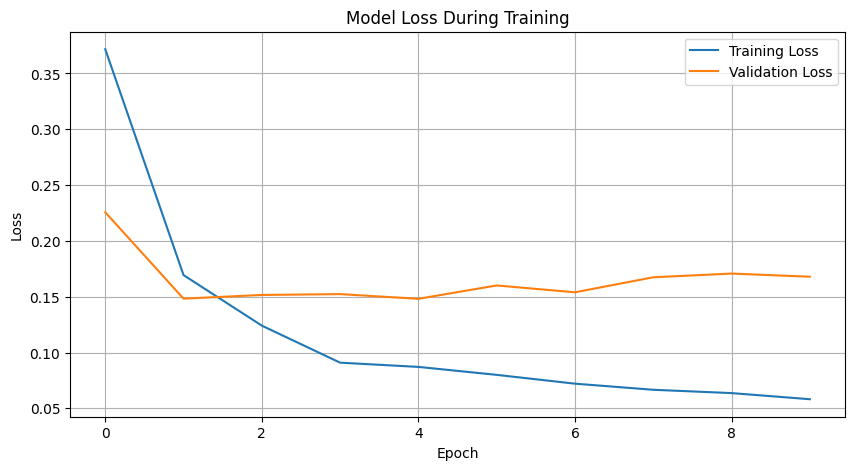

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing



# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели
model = Sequential()

# Добавление первого слоя с 64 нейронами и функцией активации ReLU
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(Activation('relu'))

# Добавление второго слоя с 32 нейронами и функцией активации ReLU
model.add(Dense(32))
model.add(Activation('relu'))

# Добавление выходного слоя с 1 нейроном и линейной функцией активации (для регрессии)
model.add(Dense(1))
model.add(Activation('linear'))

# Компиляция модели с использованием оптимизатора Adam и функции потерь mean_squared_error
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Обучение модели и сохранение истории обучения
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Оценка модели на тестовых данных
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Визуализация процесса обучения

# Построение графика потерь на тренировочных и валидационных данных
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
